<a href="https://colab.research.google.com/github/drfperez/DeepPurpose/blob/main/SwissdockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Load CSV data into a pandas DataFrame
# Assuming your file is named 'data.csv'
for filename in uploaded.keys():
    # Read CSV file, skipping the first row
    df = pd.read_csv(filename, header=None, skiprows=1)

# Calculate statistics
mean = df.mean().values[0]
std_dev = df.std().values[0]
minimum = df.min().values[0]
maximum = df.max().values[0]
num_data = df.count().values[0]

# Print results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Number of Data Points:", num_data)

Saving deltaG_values.csv to deltaG_values (2).csv
Mean: -6.986684151562501
Standard Deviation: 0.448293433078647
Minimum: -8.282232
Maximum: -5.9765425
Number of Data Points: 256


Upload CSV files one by one. Press Cancel to stop uploading.


Saving clusters.dock4 (1).csv to clusters.dock4 (1).csv


Saving clusters.dock4 (6).csv to clusters.dock4 (6) (1).csv


ValueError: boxplot method requires numerical columns, nothing to plot.

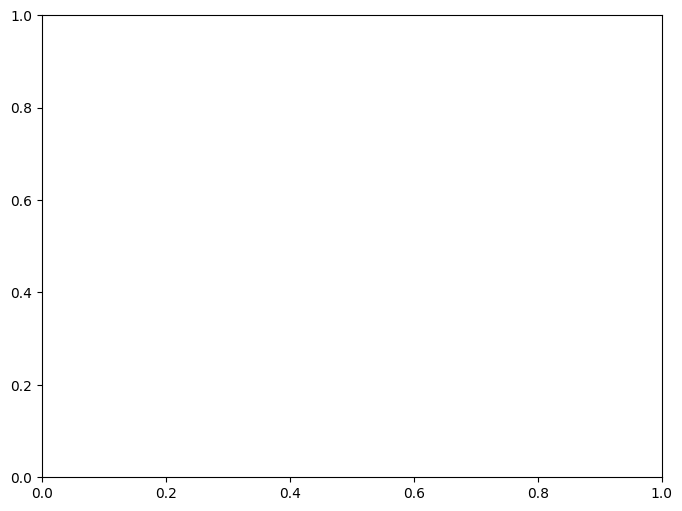

In [ ]:


from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Save the transposed DataFrame to a new CSV file
transposed_csv_path = 'transposed_data.csv'
transposed_df.to_csv(transposed_csv_path)

# Create a boxplot for compounds A and B
plt.figure(figsize=(8, 6))
boxplot = transposed_df[['Compound A', 'Compound B']].boxplot(vert=False, return_type='dict')

# Overlay individual data points
for i, df_name in enumerate(['Compound A', 'Compound B']):
    y = np.random.normal(i + 1, 0.1, size=len(transposed_df[df_name]))  # adding some random noise to scatter the points
    plt.scatter(transposed_df[df_name], y, label=f'{df_name} energies', alpha=0.5, s=10)  # smaller point size
    # Annotate each data point with the compound name
    for x, y_coord in zip(transposed_df[df_name], y):
        plt.text(x, y_coord, df_name.split()[1], ha='left', va='center', fontsize=8)

plt.xlabel('Binding Energy (kcal/mol)')
plt.ylabel('Compound')
plt.title('Binding Energies for Compounds A and B')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')  # Add line at 0 for reference
plt.legend()
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'boxplot.png'
plt.savefig(plot_image_path)

# Download the transposed CSV file and the plot image
files.download(transposed_csv_path)
files.download(plot_image_path)

Upload CSV files one by one. Press Cancel to stop uploading.


Saving deltaG_values.csv to deltaG_values.csv


Saving deltaG_values (1).csv to deltaG_values (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Mean,Standard Deviation,Minimum,Maximum,Number of Data
Compound,,,,,
Compound A,-6.986684,0.448293,-8.282232,-5.976542,256
Compound B,-7.070119,0.476528,-8.343674,-5.966561,256


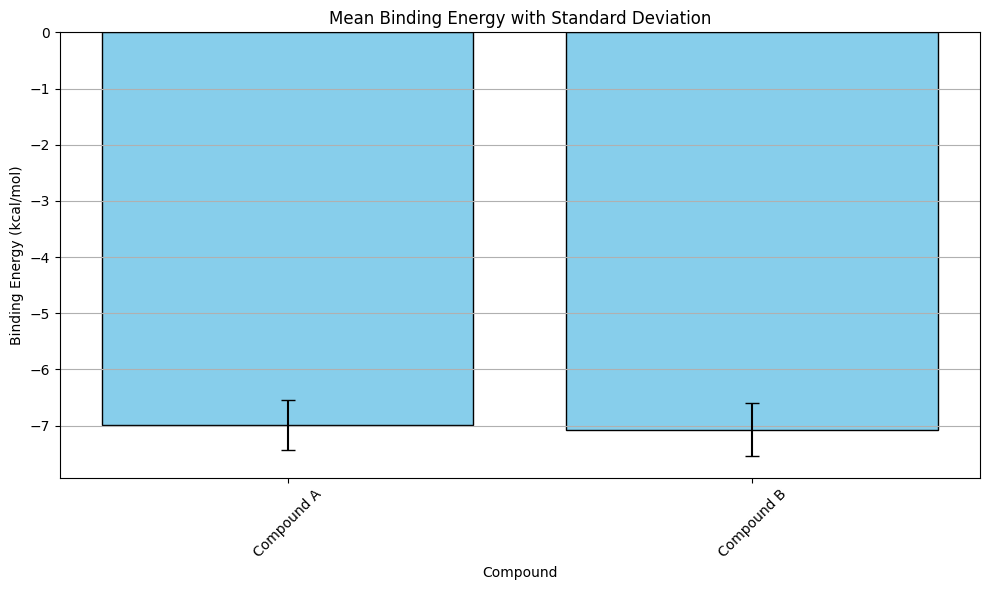

In [ ]:


from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Calculate statistics for each compound
statistics_df = pd.DataFrame({
    'Mean': transposed_df.mean(),
    'Standard Deviation': transposed_df.std(),
    'Minimum': transposed_df.min(),
    'Maximum': transposed_df.max(),
    'Number of Data': transposed_df.count()
})

# Save statistics to a CSV file
statistics_csv_path = 'compound_statistics.csv'
statistics_df.to_csv(statistics_csv_path)

# Create a bar graph with mean and standard deviation
plt.figure(figsize=(10, 6))
mean_values = statistics_df['Mean']
std_values = statistics_df['Standard Deviation']
plt.bar(mean_values.index, mean_values, yerr=std_values, capsize=5, color='skyblue', edgecolor='black')
plt.xlabel('Compound')
plt.ylabel('Binding Energy (kcal/mol)')
plt.title('Mean Binding Energy with Standard Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'mean_with_std_bar_plot.png'
plt.savefig(plot_image_path)

# Download the transposed DataFrame, statistics CSV file, and plot image
files.download(transposed_csv_path)
files.download(statistics_csv_path)
files.download(plot_image_path)

# Display the statistics DataFrame
statistics_df

Upload CSV files one by one. Press Cancel to stop uploading.


Saving deltaG_values.csv to deltaG_values (2).csv


Saving deltaG_values (1).csv to deltaG_values (1) (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

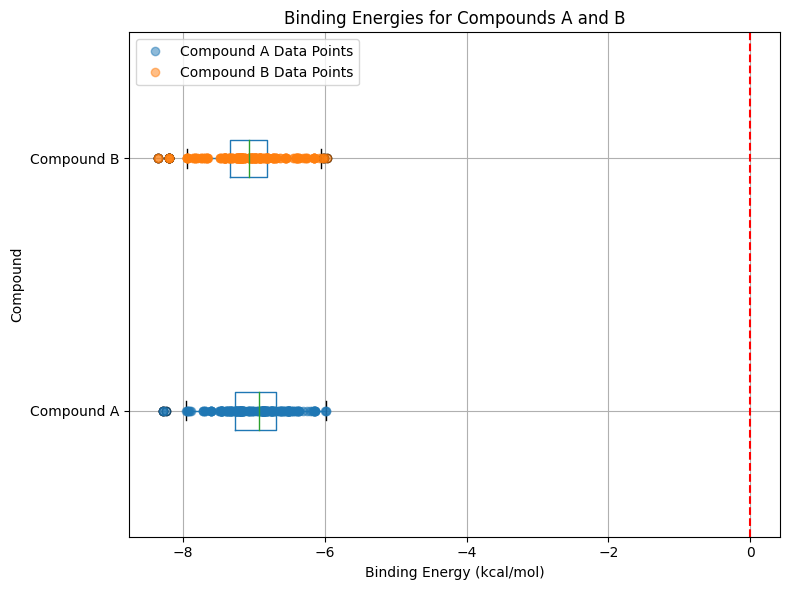

In [ ]:


from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Save the transposed DataFrame to a new CSV file
transposed_csv_path = 'transposed_data.csv'
transposed_df.to_csv(transposed_csv_path)

# Create a boxplot for compounds A and B
plt.figure(figsize=(8, 6))
boxplot = transposed_df[['Compound A', 'Compound B']].boxplot(vert=False, return_type='dict')

# Overlay individual data points
for i, df_name in enumerate(['Compound A', 'Compound B']):
    y = [i + 1] * len(transposed_df[df_name])
    plt.plot(transposed_df[df_name], y, 'o', alpha=0.5, label=f'{df_name} Data Points')

plt.xlabel('Binding Energy (kcal/mol)')
plt.ylabel('Compound')
plt.title('Binding Energies for Compounds A and B')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')  # Add line at 0 for reference
plt.legend()
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'boxplot.png'
plt.savefig(plot_image_path)

# Download the transposed CSV file and the plot image
files.download(transposed_csv_path)
files.download(plot_image_path)

Upload CSV files one by one. Press Cancel to stop uploading.


Saving deltaG_values.csv to deltaG_values (3).csv


Saving deltaG_values (1).csv to deltaG_values (1) (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

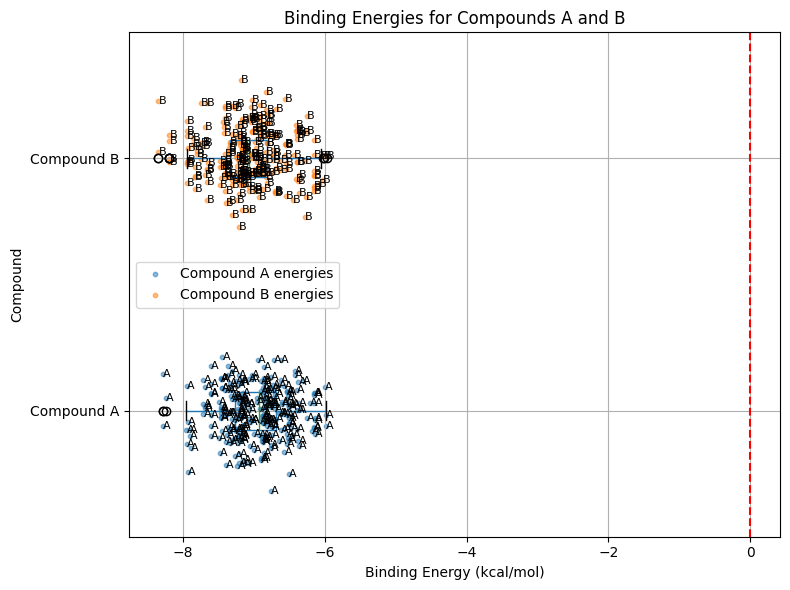

In [ ]:


from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Save the transposed DataFrame to a new CSV file
transposed_csv_path = 'transposed_data.csv'
transposed_df.to_csv(transposed_csv_path)

# Create a boxplot for compounds A and B
plt.figure(figsize=(8, 6))
boxplot = transposed_df[['Compound A', 'Compound B']].boxplot(vert=False, return_type='dict')

# Overlay individual data points
for i, df_name in enumerate(['Compound A', 'Compound B']):
    y = np.random.normal(i + 1, 0.1, size=len(transposed_df[df_name]))  # adding some random noise to scatter the points
    plt.scatter(transposed_df[df_name], y, label=f'{df_name} energies', alpha=0.5, s=10)  # smaller point size
    # Annotate each data point with the compound name
    for x, y_coord in zip(transposed_df[df_name], y):
        plt.text(x, y_coord, df_name.split()[1], ha='left', va='center', fontsize=8)

plt.xlabel('Binding Energy (kcal/mol)')
plt.ylabel('Compound')
plt.title('Binding Energies for Compounds A and B')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')  # Add line at 0 for reference
plt.legend()
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'boxplot.png'
plt.savefig(plot_image_path)

# Download the transposed CSV file and the plot image
files.download(transposed_csv_path)
files.download(plot_image_path)

Upload CSV files one by one. Press Cancel to stop uploading.


Saving deltaG_values.csv to deltaG_values (4).csv


Saving deltaG_values (1).csv to deltaG_values (1) (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

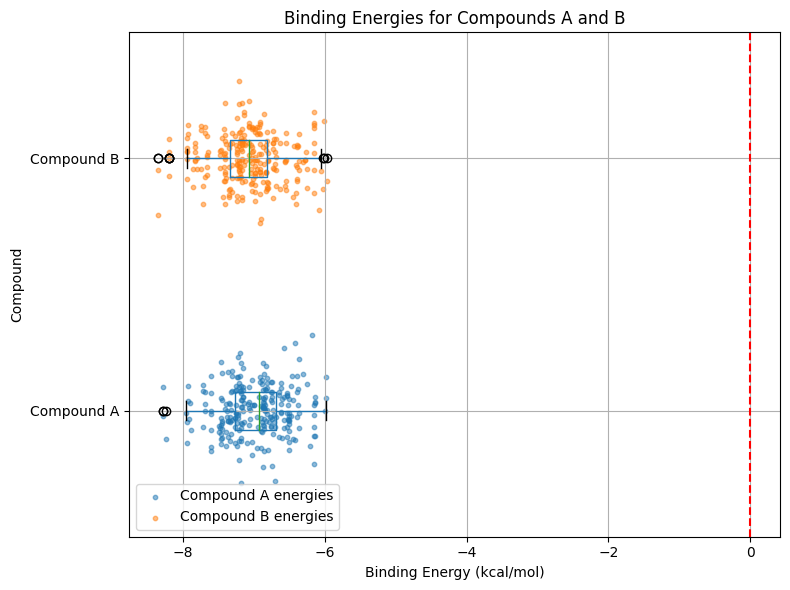

In [ ]:


from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Save the transposed DataFrame to a new CSV file
transposed_csv_path = 'transposed_data.csv'
transposed_df.to_csv(transposed_csv_path)

# Create a boxplot for compounds A and B
plt.figure(figsize=(8, 6))
boxplot = transposed_df[['Compound A', 'Compound B']].boxplot(vert=False, return_type='dict')

# Overlay individual data points
for i, df_name in enumerate(['Compound A', 'Compound B']):
    y = np.random.normal(i + 1, 0.1, size=len(transposed_df[df_name]))  # adding some random noise to scatter the points
    plt.scatter(transposed_df[df_name], y, label=f'{df_name} energies', alpha=0.5, s=10)  # smaller point size

plt.xlabel('Binding Energy (kcal/mol)')
plt.ylabel('Compound')
plt.title('Binding Energies for Compounds A and B')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')  # Add line at 0 for reference
plt.legend()
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'boxplot.png'
plt.savefig(plot_image_path)

# Download the transposed CSV file and the plot image
files.download(transposed_csv_path)
files.download(plot_image_path)

Upload CSV files one by one. Press Cancel to stop uploading.


Saving deltaG_values.csv to deltaG_values (5).csv


Saving deltaG_values (1).csv to deltaG_values (1) (4).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

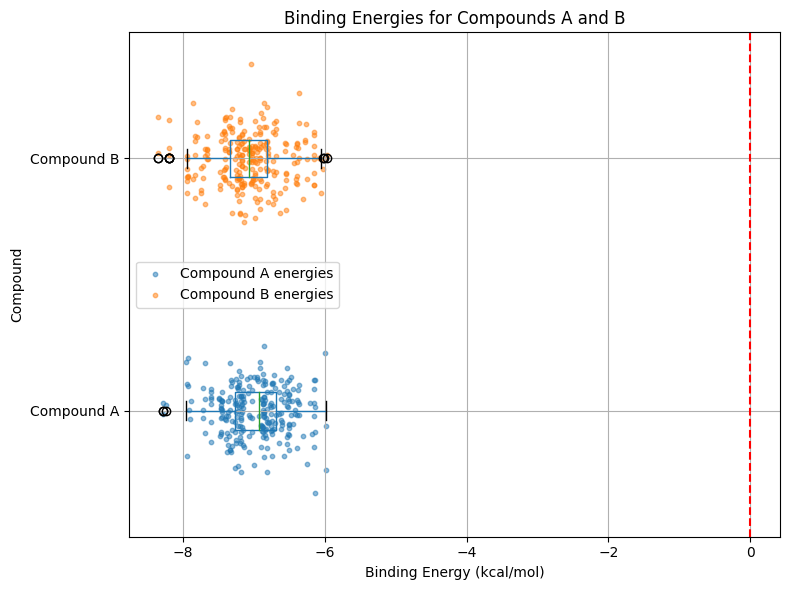

In [ ]:


from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Save the transposed DataFrame to a new CSV file
transposed_csv_path = 'transposed_data.csv'
transposed_df.to_csv(transposed_csv_path)

# Create a boxplot for compounds A and B
plt.figure(figsize=(8, 6))
boxplot = transposed_df[['Compound A', 'Compound B']].boxplot(vert=False, return_type='dict')

# Overlay individual data points
for i, df_name in enumerate(['Compound A', 'Compound B']):
    y = np.random.normal(i + 1, 0.1, size=len(transposed_df[df_name]))  # adding some random noise to scatter the points
    plt.scatter(transposed_df[df_name], y, label=f'{df_name} energies', alpha=0.5, s=10)  # smaller point size

plt.xlabel('Binding Energy (kcal/mol)')
plt.ylabel('Compound')
plt.title('Binding Energies for Compounds A and B')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')  # Add line at 0 for reference
plt.legend()
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'boxplot.png'
plt.savefig(plot_image_path)

# Download the transposed CSV file and the plot image
files.download(transposed_csv_path)
files.download(plot_image_path)